# Pure Arbitrage (Pure Arb) -> Cross Exchange Arbitrage
- Contingent on Speed & spotting inefficiencies within the market
- Simultaneously buys and sells a security in different markets to take advatanges of price differences
- ONLY if you have the fastest algorithm for execution and implementation; this helps the markets to be more efficient

## NOTE: THIS IS NOT A PRODUCTION LEVEL EXAMPLE
Proof of concept in Theory

In [3]:
import pandas as pd
import numpy as np

In [10]:
gemini = pd.read_excel('BTCPrices.xlsx',sheet_name = 'Gemini', na_values=None) # You would replace these datasets with 
# live streamed data.
reuters = pd.read_excel('BTCPrices.xlsx', sheet_name = 'Reuters') # Note that you can't actually trade Crypto on Eikon Reuters.
# This is just pricing history data. (and an example.)

In [11]:
gemini = gemini.set_index("Date (EST)")
gemini.head()

,Unix Timestamp,Date (UTC),Date (EST Value),Time,Symbol,Open,High,Low,Close,Volume
Date (EST),,,,,,,,,,
2021-11-20 19:04:00,1637453040000,2021-11-21 00:04:00,2021-11-20 19:04:00,19:04:00,BTCUSD,59710.00,59750.12,59701.05,59736.69,4.922584
2021-11-20 19:03:00,1637452980000,2021-11-21 00:03:00,2021-11-20 19:03:00,19:03:00,BTCUSD,59693.05,59717.75,59668.88,59710.00,0.798032
2021-11-20 19:02:00,1637452920000,2021-11-21 00:02:00,2021-11-20 19:02:00,19:02:00,BTCUSD,59721.66,59721.66,59672.27,59693.05,1.134838
2021-11-20 19:01:00,1637452860000,2021-11-21 00:01:00,2021-11-20 19:01:00,19:01:00,BTCUSD,59779.96,59779.96,59692.75,59721.66,0.511603
2021-11-20 19:00:00,1637452800000,2021-11-21 00:00:00,2021-11-20 19:00:00,19:00:00,BTCUSD,59770.47,59795.45,59766.62,59779.96,0.144430


In [12]:
reuters = reuters.set_index("Time")
reuters.head()

,Local Date,Bid,Ask,High,Low,Open,Refresh Rate,BidNet
Time,,,,,,,,
2021-11-20 19:04:00,2021-11-20 19:04:00,59700.04,59722.97,59709.00,59643.90,59692.80,117,36.54
2021-11-20 19:03:00,2021-11-20 19:03:00,59663.50,59708.14,59711.00,59646.17,59711.00,136,-21.90
2021-11-20 19:02:00,2021-11-20 19:02:00,59685.40,59705.80,59756.30,59655.07,59751.04,102,-77.01
2021-11-20 19:01:00,2021-11-20 19:01:00,59762.41,59780.21,59794.27,59727.89,59748.71,93,13.70
2021-11-20 19:00:00,2021-11-20 19:00:00,59748.71,59768.54,59748.71,59672.10,59731.89,64,36.54


In [13]:
# Focusing on opening value for BTC Arbitrage 
# Reuters opened at 59,692.80 and 
# Gemini opened at 59,710.00
# |59,692.80 - 59,710.00| = 17.2
# 17.2 / ~ 60,000 is approximately .000286 or .0286%.
# However, there are fees 
# that are associated with trading crypto currencies. SO, 
# this spread is not worth it at all! (Example Coinbase charges 2%, 
# which is $1200. -- cheaper if you go coinbase Pro)

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


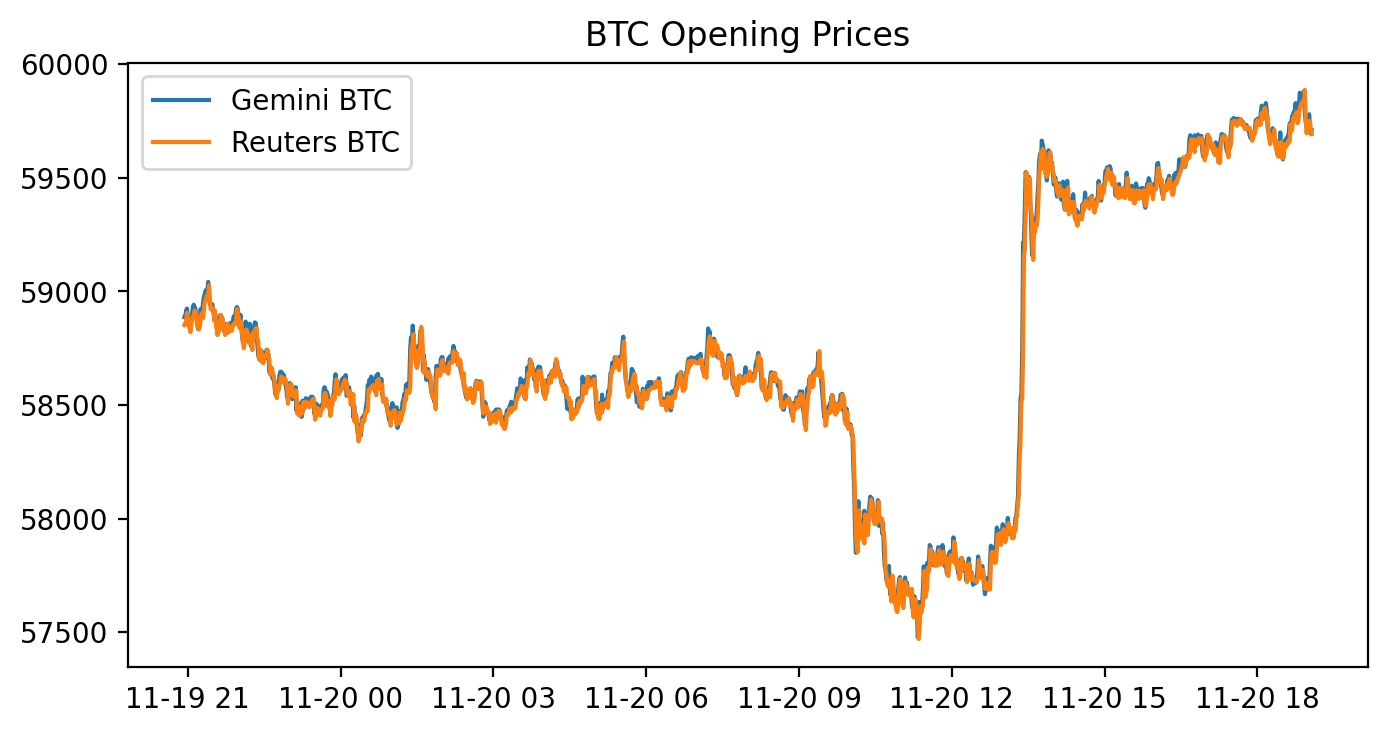

In [15]:
figure(figsize=(8, 4), dpi=200)
gem_BTC = gemini['Open']
reu_BTC = reuters['Open']
plt.plot(gem_BTC, label = "Gemini BTC")
plt.plot(reu_BTC, label = "Reuters BTC")
plt.title('BTC Opening Prices')
plt.legend()

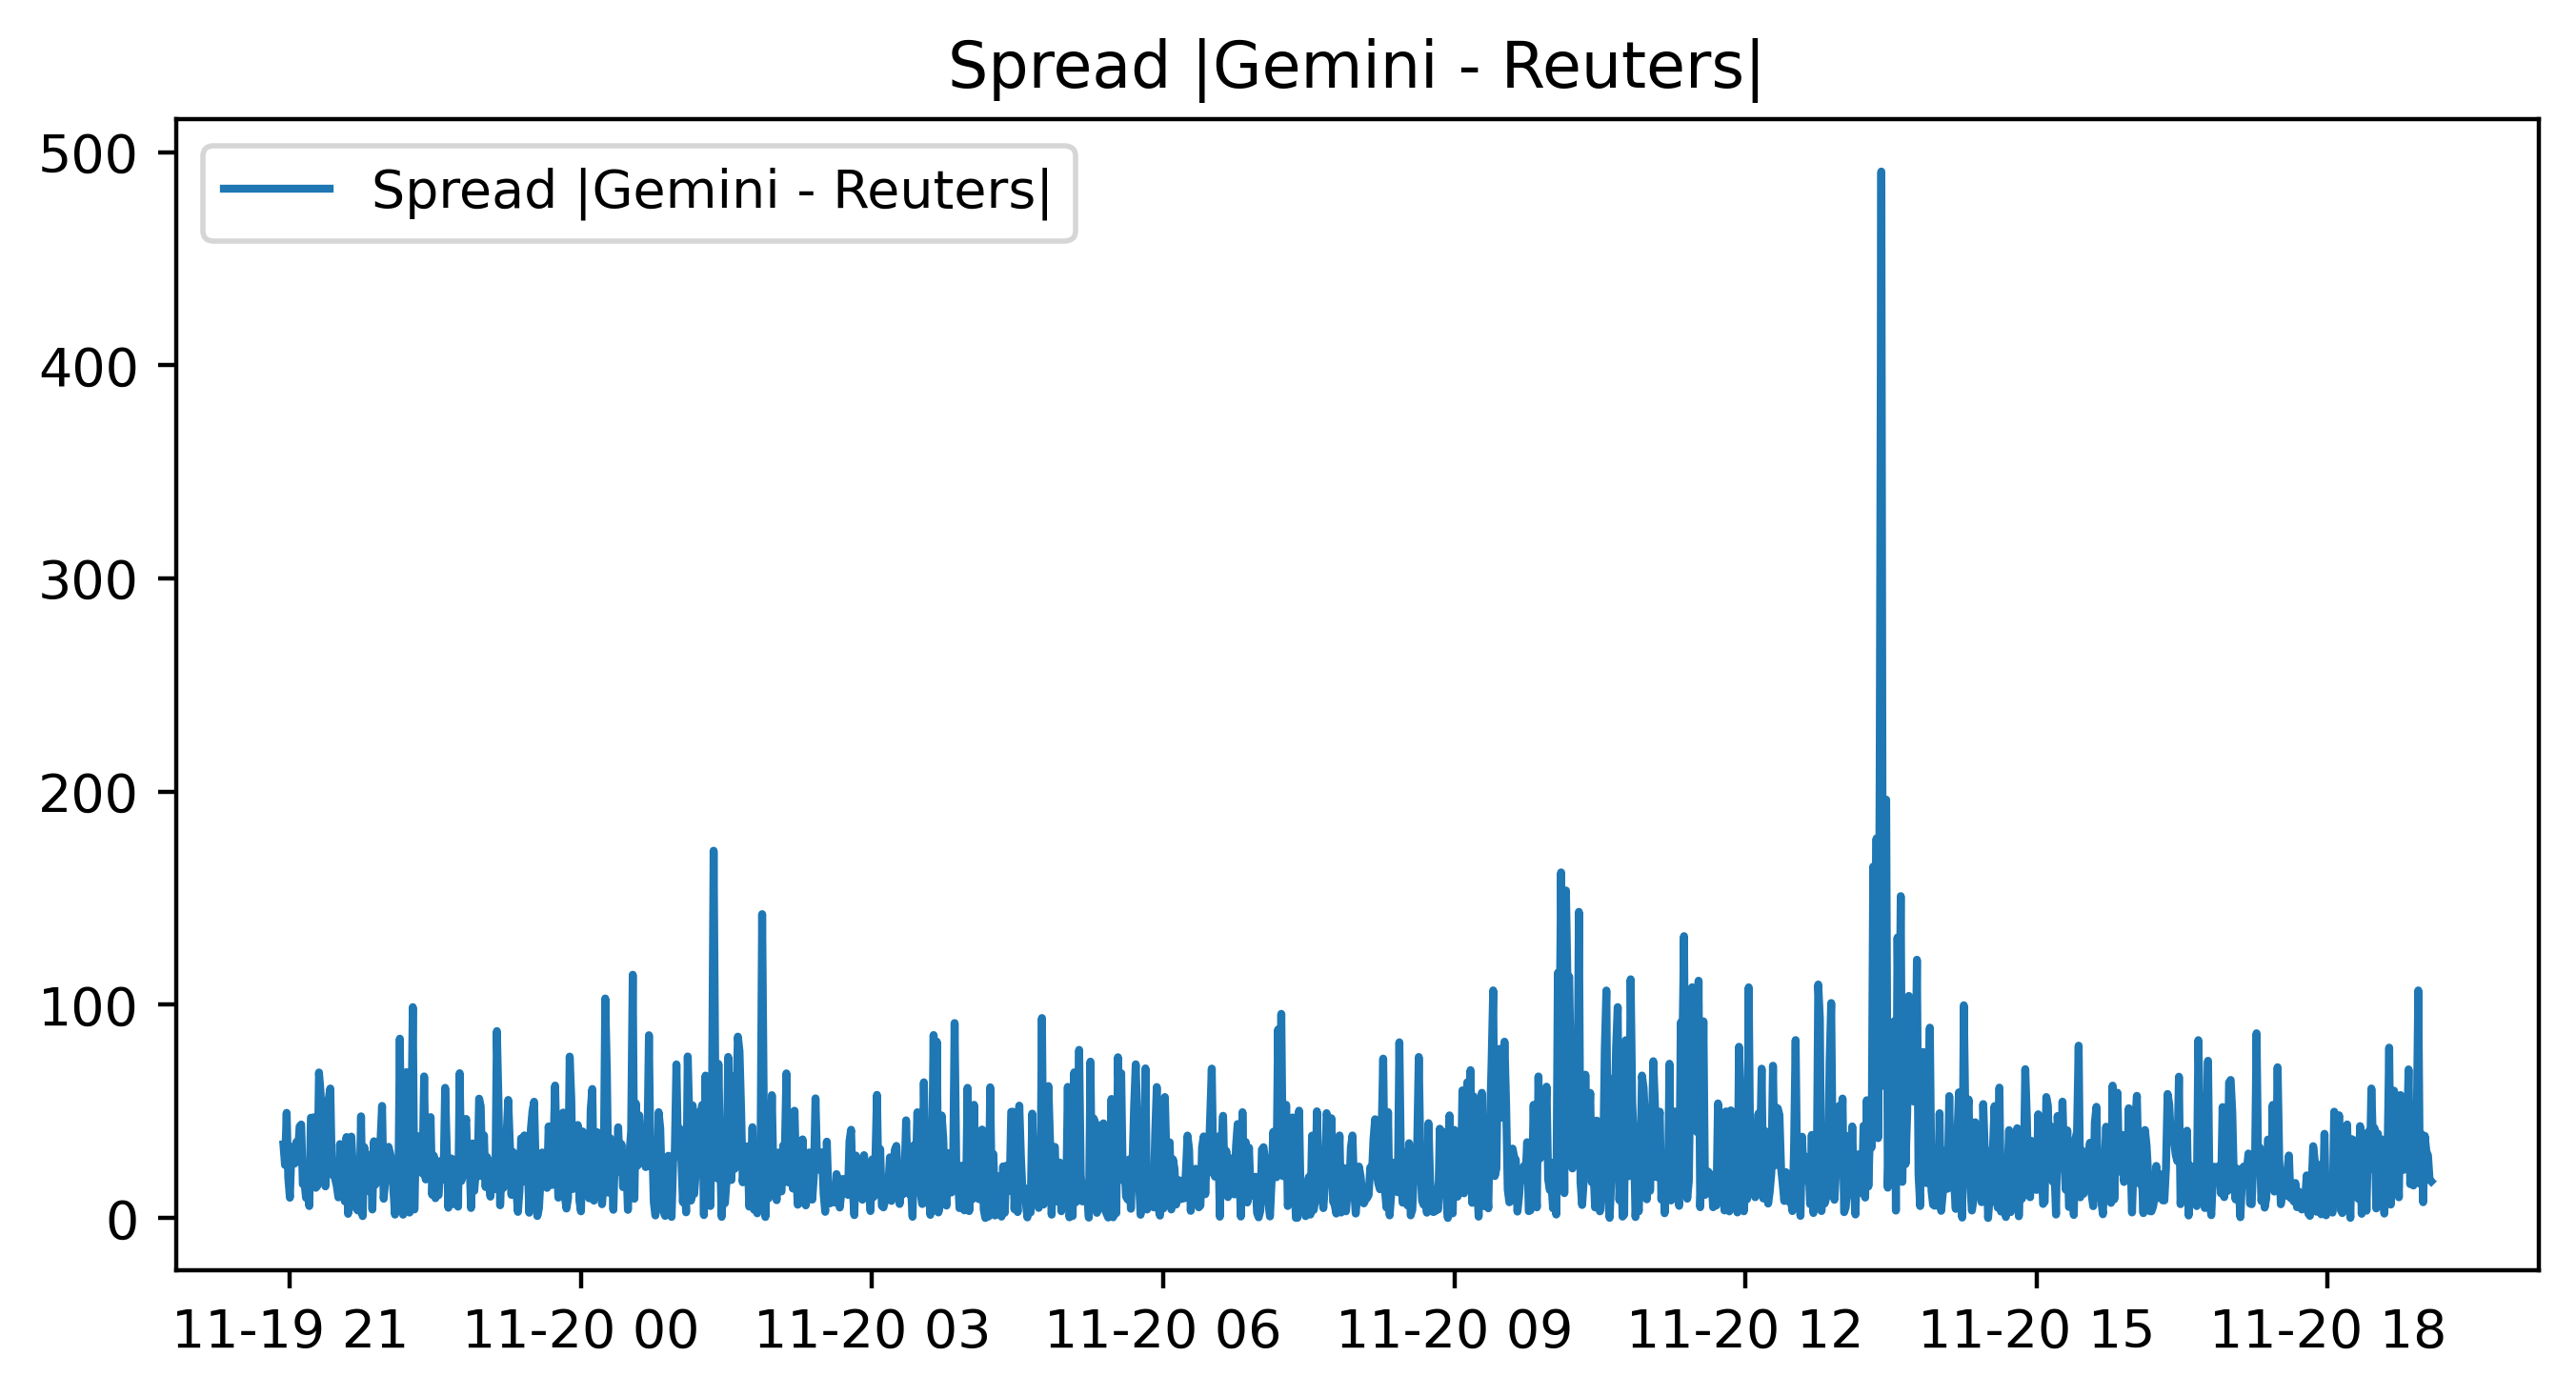

In [16]:
figure(figsize=(8, 4), dpi=400)
plt.plot(abs(gem_BTC - reu_BTC), label = "Spread |Gemini - Reuters|")
plt.title('Spread |Gemini - Reuters|')
plt.legend()


In [17]:
# Sum of the entire spread?
# In a PERFECT environment. This does not include fees.
sum(abs(gem_BTC - reu_BTC))

38496.399999999936

In [18]:
# Buy Low in one exchange and sell high in the other exchange.
# 0.2% average between maker and taker.
comb_df = pd.concat([gem_BTC,
                     reu_BTC,
                     abs(gem_BTC - reu_BTC),
                     0.002 * (gem_BTC + reu_BTC)], axis = 1) 
comb_df.columns = ["Gemini_Open", "Reuters_Open", "Absolute_Difference", "Total_Tax"]
comb_df

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472
...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372


In [19]:
# Check out which accounts in the corresponding exchanges need to be bought or sold.
v = pd.DataFrame(np.where(comb_df["Gemini_Open"] > comb_df["Reuters_Open"], 0,1))
v.index = comb_df.index
v.columns = ["BuyGemSellReuOrder"]
comb_df = pd.concat([comb_df, v], axis= 1)
comb_df # Exchange Signal = 0, Sell Gemini;

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560,0
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810,1
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540,1
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734,0
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472,0
...,...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454,1
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070,0
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870,0
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372,0


In [20]:
# Execute Trade for profit?
# Check out which accounts in the corresponding exchanges need to be bought or sold.
order66 = pd.DataFrame(np.where(comb_df["Absolute_Difference"] > comb_df["Total_Tax"], 0,1))
order66.index = comb_df.index
order66.columns = ["Execute"]
comb_df = pd.concat([comb_df, order66], axis= 1)
comb_df

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder,Execute
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560,0,1
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810,1,1
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540,1,1
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734,0,1
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472,0,1
...,...,...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454,1,1
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070,0,1
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870,0,1
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372,0,1


In [21]:
np.unique(comb_df["Execute"], return_counts = True) #LOL!

(array([0, 1]), array([   1, 1328]))

In [22]:
# Talling orders that would've been executed.
orders_fulfilled = comb_df.loc[comb_df["Execute"] == 0]
orders_fulfilled

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder,Execute
2021-11-20 13:24:00,59216.09,58725.23,490.86,235.88264,0,0


In [23]:
total_profits = sum(orders_fulfilled["Absolute_Difference"] - orders_fulfilled["Total_Tax"])
total_profits 

254.9773599999933

In [24]:
# everything will be a multiple as volume is not included
# Retrieving that specific row:
gemini[comb_df["Gemini_Open"] == 59216.09] 

,Unix Timestamp,Date (UTC),Date (EST Value),Time,Symbol,Open,High,Low,Close,Volume
Date (EST),,,,,,,,,,
2021-11-20 13:24:00,1637432640000,2021-11-20 18:24:00,2021-11-20 13:24:00,13:24:00,BTCUSD,59216.09,59347.67,59029.89,59218.88,27.313468


In [25]:
# So, in a perfect world, if there were 27.31 bitcoins on the "Reuters" 
# exchange and the capital to pull that arbitrage was available 
# profits:
(27.313468/2) * total_profits

3482.1579815421487